# Required Imports for level 3

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Task-2: Votes Analysis


### Identify the restaurants with the highest and lowest number of votes.


In [3]:
data = pd.read_csv("E:\\congnifyz_internship\\Dataset .csv")
highest_votes = data.loc[data['Votes'].idxmax()]  
lowest_votes = data.loc[data['Votes'].idxmin()] 
print("Restaurant with the highest votes:->")
print(highest_votes)
print("\nRestaurant with the lowest votes:->")
print(lowest_votes)

Restaurant with the highest votes:->
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
H

### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Votes and Rating: 0.31


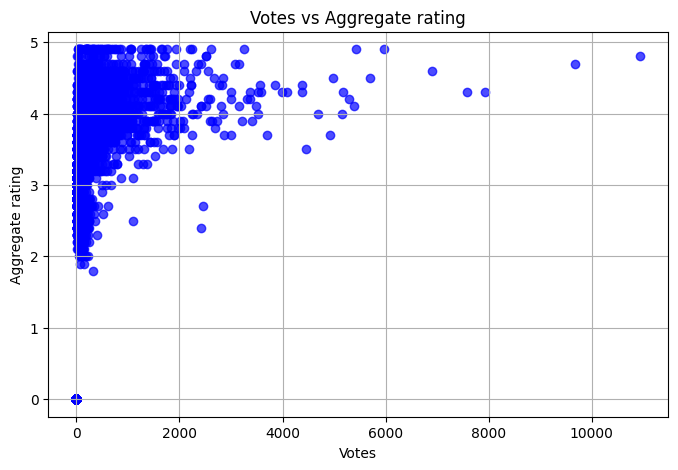

In [4]:

df = pd.read_csv("E:\\congnifyz_internship\\Dataset .csv")
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Votes and Rating: {correlation:.2f}")
plt.figure(figsize=(8, 5))
plt.scatter(df['Votes'], df['Aggregate rating'], color='blue', alpha=0.7)
plt.title('Votes vs Aggregate rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()

## Task-3: Price Range vs. Online Delivery and Table Booking


### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


Average Price Range by Online Delivery and Table Booking Availability:
  Has Online delivery Has Table booking  Price range
0                  No                No     1.604673
1                  No               Yes     3.163209
2                 Yes                No     1.735119
3                 Yes               Yes     2.804598


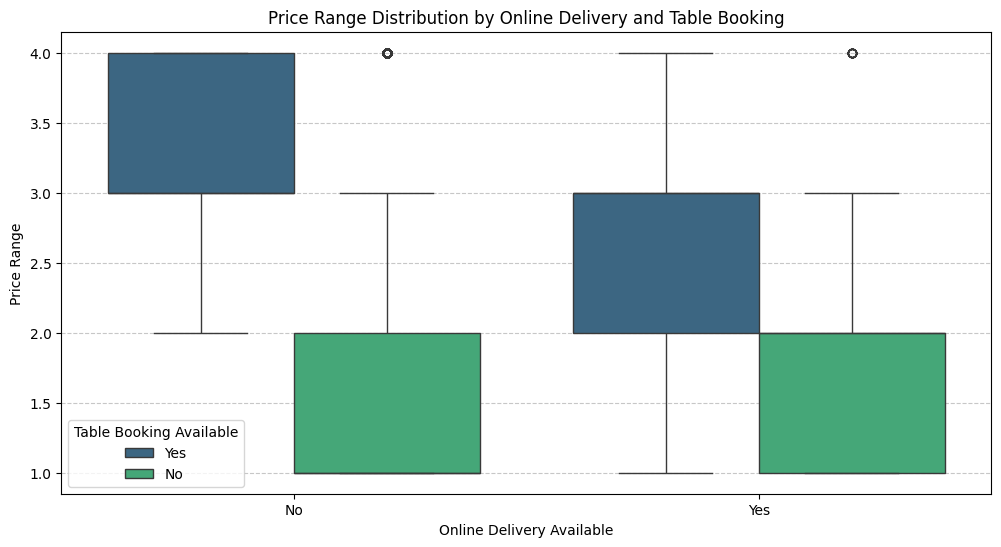

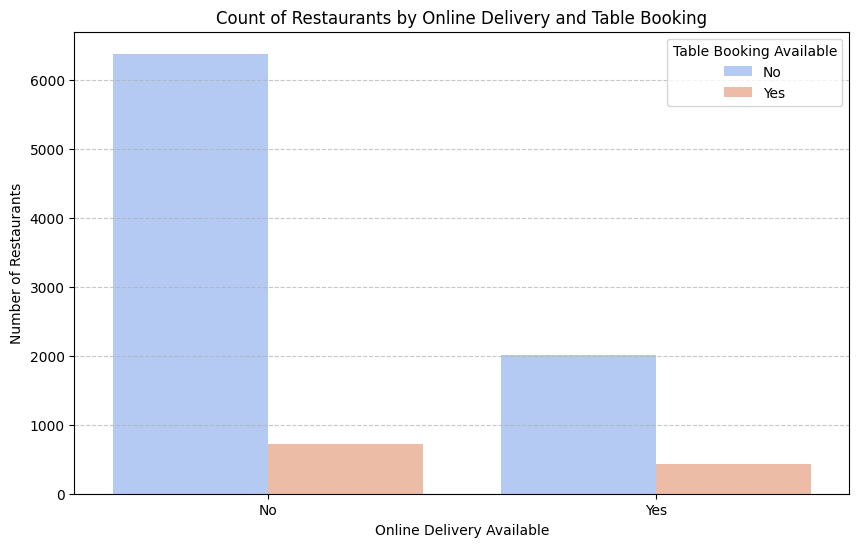

In [7]:
summary = data.groupby(['Has Online delivery', 'Has Table booking'])['Price range'].mean().reset_index()

print("Average Price Range by Online Delivery and Table Booking Availability:")
print(summary)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Has Online delivery', y='Price range', hue='Has Table booking', palette='viridis')
plt.title("Price Range Distribution by Online Delivery and Table Booking")
plt.xlabel("Online Delivery Available")
plt.ylabel("Price Range")
plt.legend(title="Table Booking Available")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
delivery_table_counts = data.groupby(['Has Online delivery', 'Has Table booking']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=delivery_table_counts, x='Has Online delivery', y='Count', hue='Has Table booking', palette='coolwarm')
plt.title("Count of Restaurants by Online Delivery and Table Booking")
plt.xlabel("Online Delivery Available")
plt.ylabel("Number of Restaurants")
plt.legend(title="Table Booking Available")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Determine if higher-priced restaurants are more likely to offer these services.


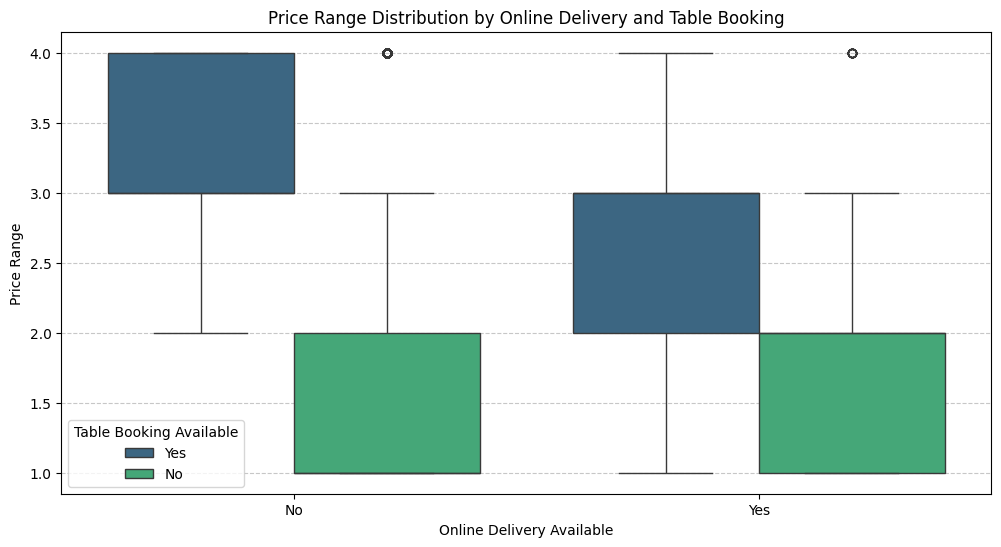

T-test for Online Delivery: Stat = 7.64, p-value = 0.0000
T-test for Table Booking: Stat = 56.71, p-value = 0.0000

Proportion of Restaurants with Online Delivery by Price Range:
Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Yes, dtype: float64

Proportion of Restaurants with Table Booking by Price Range:
Price range
1    0.000225
2    0.076775
3    0.457386
4    0.467577
Name: Yes, dtype: float64


In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Has Online delivery', y='Price range', hue='Has Table booking', palette='viridis')
plt.title("Price Range Distribution by Online Delivery and Table Booking")
plt.xlabel("Online Delivery Available")
plt.ylabel("Price Range")
plt.legend(title="Table Booking Available")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
online_delivery = data[data['Has Online delivery'] == 'Yes']['Price range']
no_online_delivery = data[data['Has Online delivery'] == 'No']['Price range']
stat_delivery, p_value_delivery = ttest_ind(online_delivery, no_online_delivery)
print(f"T-test for Online Delivery: Stat = {stat_delivery:.2f}, p-value = {p_value_delivery:.4f}")
table_booking = data[data['Has Table booking'] == 'Yes']['Price range']
no_table_booking = data[data['Has Table booking'] == 'No']['Price range']
stat_table, p_value_table = ttest_ind(table_booking, no_table_booking)
print(f"T-test for Table Booking: Stat = {stat_table:.2f}, p-value = {p_value_table:.4f}")
delivery_proportion = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)['Yes']
booking_proportion = data.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0)['Yes']
print("\nProportion of Restaurants with Online Delivery by Price Range:")
print(delivery_proportion)
print("\nProportion of Restaurants with Table Booking by Price Range:")
print(booking_proportion)